In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
import seaborn as sn

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 15s 1us/step


In [6]:
x_train.shape 

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

x_tarin for 1  : 
y_tarin for 1  :  0


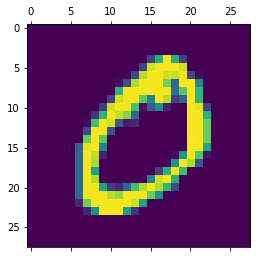

In [19]:
def mat(i):
    print('x_tarin for',i,' : ')
    plt.matshow(x_train[i])
    print('y_tarin for',i,' : ',y_train[i])
    
mat(1)    

### Convert from 2D Array to 1D Array (Flatten)

In [21]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [24]:
x_test.shape

(10000, 28, 28)

In [27]:
x_test_flattened = x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

### Creation of Neural Network

In [46]:
model = keras.Sequential([
    #28*28 input layer and 10 output without hidden layers
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')
])

#Configures the model for training.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(x_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 10.1089 - accuracy: 0.8362
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.9502 - accuracy: 0.8806
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.6583 - accuracy: 0.8822
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4843 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 5.2841 - accuracy: 0.8873


### Scale the input

In [50]:
# We have a data range [0-255] so we need to scale this input into a range from 0 to 1 [0-1] (x/255)
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [53]:
x_train_scaled_flattened = x_train_scaled.reshape(len(x_train_scaled),28*28)
x_test_scaled_flattened = x_test_scaled.reshape(len(x_test_scaled),28*28)

In [54]:
model = keras.Sequential([
    #28*28 input layer and 10 output without hidden layers
    keras.layers.Dense(10,input_shape=(28*28,),activation='sigmoid')
])

#Configures the model for training.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(x_train_scaled_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4696 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3046 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2837 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9257


#### Evaluate 

In [55]:
model.evaluate(x_test_scaled_flattened , y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2661 - accuracy: 0.9255


[0.2660958170890808, 0.9254999756813049]

#### Prediction

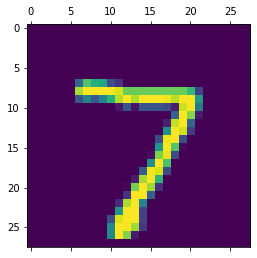

In [56]:
plt.matshow(x_test[0])

In [62]:
y_test[0]

7

In [58]:
y_pred = model.predict(x_test_scaled_flattened)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([1.8458774e-02, 1.7030462e-07, 6.3286953e-02, 9.5681351e-01,
       2.6920203e-03, 1.5952645e-01, 2.7654974e-06, 9.9972600e-01,
       8.8180847e-02, 6.6115409e-01], dtype=float32)

In [60]:
max(y_pred[0])
#Returns the indices of the maximum values along an axis.
np.argmax(y_pred[0])

7

Input Image:  3
Output :  3


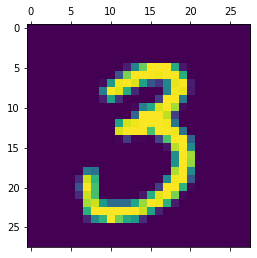

In [68]:
def predict(i):
    print('Input Image: ', y_test[i])
    plt.matshow(x_test[i])
    print('Output : ', np.argmax(y_pred[i]))

predict(90)

#### Cofusion matrix

In [72]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:3]

[7, 2, 1]

In [86]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [75]:
#Computes the confusion matrix from predictions and labels.
cm = tf.math.confusion_matrix(labels=y_test ,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    2,    4,    2,   13,    0],
       [   7,    7,  926,   16,    8,    6,   12,    9,   38,    3],
       [   3,    0,   21,  924,    0,   27,    2,    9,   18,    6],
       [   1,    1,    4,    1,  922,    0,   10,    3,   10,   30],
       [   9,    1,    3,   28,   10,  793,   13,    2,   28,    5],
       [  11,    3,    7,    1,    7,   15,  911,    1,    2,    0],
       [   1,    5,   25,    8,    9,    1,    0,  937,    3,   39],
       [   7,    7,    7,   28,    9,   33,    9,   10,  859,    5],
       [  10,    7,    2,   12,   33,   11,    0,   17,    5,  912]])>

Text(69.0, 0.5, 'Truth')

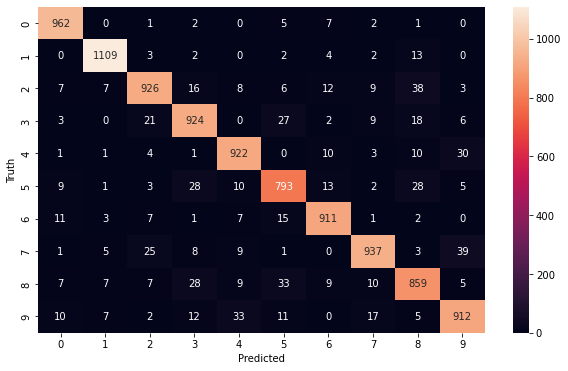

In [87]:
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Adding a Hidden Layer to NN

In [88]:
model = keras.Sequential([
    #28*28 input layer and 10 output with a hidden layer contains 100 neurons
    keras.layers.Dense(100, input_shape=(28*28,), activation='relu'),
    #output layer contains 10 output
    keras.layers.Dense(10, activation='sigmoid')
])

#Configures the model for training.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(x_train_flattened , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.4137 - accuracy: 0.8513
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3686 - accuracy: 0.9098
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2791 - accuracy: 0.9289
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2486 - accuracy: 0.9373
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2211 - accuracy: 0.9417


In [89]:
model.evaluate(x_test_flattened , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2785 - accuracy: 0.9335


[0.27853143215179443, 0.9334999918937683]

In [90]:
y_pred = model.predict(x_test_scaled_flattened)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([0.52483046, 0.45014095, 0.5490969 , 0.4992028 , 0.56339365,
       0.44367176, 0.35615146, 0.42884937, 0.6915012 , 0.5814664 ],
      dtype=float32)

Text(69.0, 0.5, 'Truth')

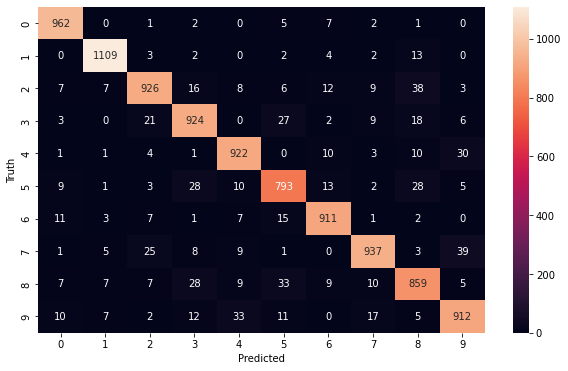

In [91]:
cm = tf.math.confusion_matrix(labels=y_test ,predictions=y_pred_labels)
cm
plt.figure(figsize=(10,6))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
#after adding a hidden layer the accuracy improved and the mistakes decressed

### Notes

In [93]:
# Flatten Dense withount needing to converting manualy
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

#Configures the model for training.
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#Trains the model for a fixed number of epochs (iterations on a dataset).
model.fit(x_train , y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 2.8043 - accuracy: 0.8490
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4392 - accuracy: 0.8997
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3009 - accuracy: 0.9246
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2551 - accuracy: 0.9351
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2268 - accuracy: 0.9432
